In [1]:
import json
import pandas as pd
from sklearn import ensemble, preprocessing, metrics
from sklearn.model_selection  import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [13]:
# import label data
with open('C:\\Users\\Gina\\Lab\\kidney\\kits21\\kits21\\data\\kits.json') as f:
    data = json.load(f)

def print_count(data, col_name):
    _type = [ case[col_name] for case in data ]
    _count = {}
    for label in set(_type):
        _count[label] = _type.count(label)
        
    print(_count)
    return _count

tumor_count = print_count(data, 'tumor_histologic_subtype')
print('-' * 20)
print_count(data, 'pathology_t_stage')
print('-' * 20)
print_count(data, 'tumor_isup_grade')
print('-' * 20)
print_count(data, 'malignant')

{'urothelial': 3, 'other': 1, 'oncocytoma': 16, 'collecting_duct_undefined': 1, 'rcc_unclassified': 2, 'clear_cell_rcc': 204, 'angiomyolipoma': 5, 'spindle_cell_neoplasm': 1, 'clear_cell_papillary_rcc': 7, 'papillary': 28, 'chromophobe': 27, 'wilms': 1, 'mest': 3, 'multilocular_cystic_rcc': 1}
--------------------
{'1b': 59, '0': 25, '4': 5, '2b': 5, '1a': 121, '3': 70, '2a': 15}
--------------------
{1: 33, 2: 119, 3: 66, 4: 26, None: 56}
--------------------
{False: 25, True: 275}


{False: 25, True: 275}

In [14]:
kits_data = pd.DataFrame(data)

In [15]:
kits_data.groupby(['malignant', 'tumor_histologic_subtype']).size()

malignant  tumor_histologic_subtype 
False      angiomyolipoma                 5
           mest                           3
           oncocytoma                    16
           spindle_cell_neoplasm          1
True       chromophobe                   27
           clear_cell_papillary_rcc       7
           clear_cell_rcc               204
           collecting_duct_undefined      1
           multilocular_cystic_rcc        1
           other                          1
           papillary                     28
           rcc_unclassified               2
           urothelial                     3
           wilms                          1
dtype: int64

In [16]:
tumor_count.keys()

dict_keys(['urothelial', 'other', 'oncocytoma', 'collecting_duct_undefined', 'rcc_unclassified', 'clear_cell_rcc', 'angiomyolipoma', 'spindle_cell_neoplasm', 'clear_cell_papillary_rcc', 'papillary', 'chromophobe', 'wilms', 'mest', 'multilocular_cystic_rcc'])

Text(0, 0.5, 'Count')

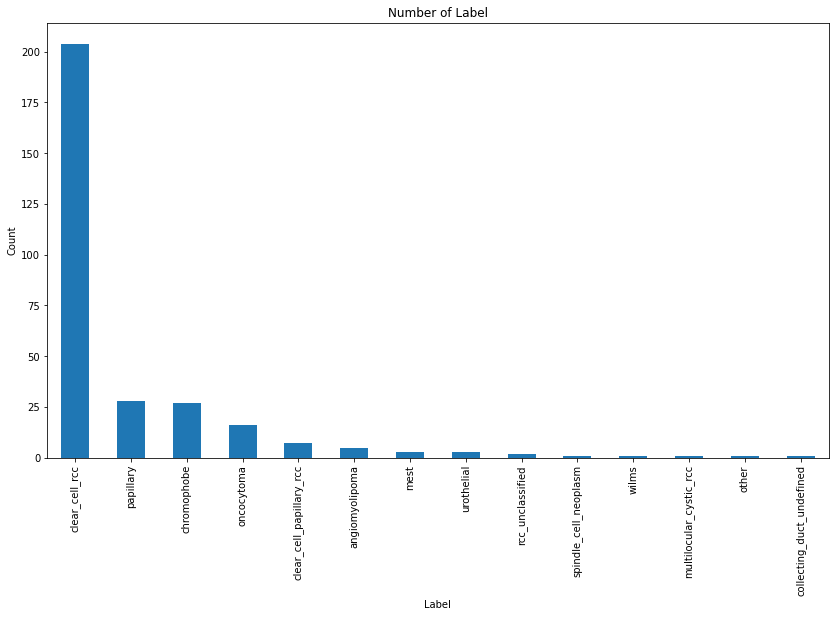

In [18]:
# Print the label distribution
ax = kits_data['tumor_histologic_subtype'].value_counts().plot(kind='bar',
                                           figsize=(14,8),
                                           title="Number of Label")
ax.set_xlabel("Label")
ax.set_ylabel("Count")

In [19]:
df = pd.read_csv("C:\\Users\\Gina\\Lab\\kidney\\radiomics\\result\\299_radiomics_feature.csv", index_col=0)

# drop useless columns
df = df.iloc[:, 37:]

In [20]:
# drop uesless type data
df['tumor_type'] = kits_data['tumor_histologic_subtype']
df['malignant'] = kits_data['malignant']

useless_type = ['rcc_unclassified',
                'urothelial',
                'mest',
                'collecting_duct_undefined',
                'oncocytoma',
                'clear_cell_papillary_rcc', 
                'multilocular_cystic_rcc', 
                'other', 'wilms', 
                'angiomyolipoma', 'spindle_cell_neoplasm']

for _type in useless_type:
    df_remove = df.drop(df.loc[df['tumor_type'] == _type].index)

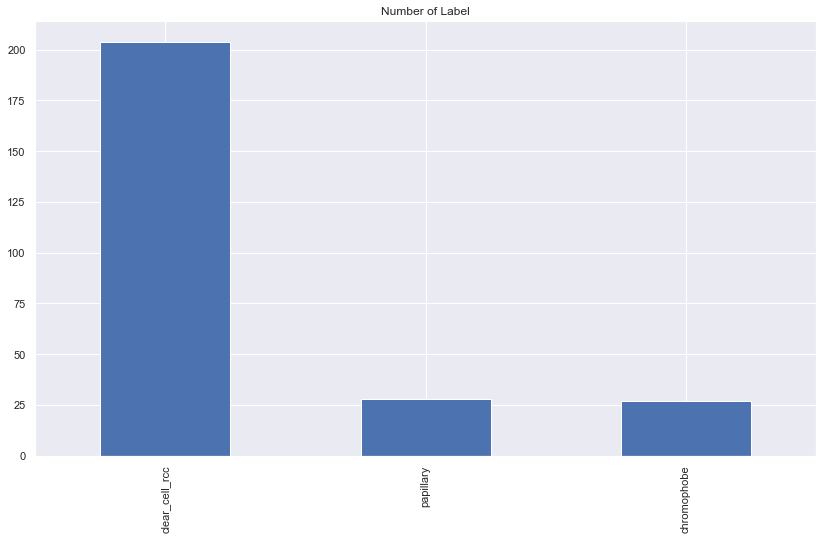

In [88]:
ax = df['tumor_type'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Label")

print('left data:', len(df))

In [80]:
label = df['tumor_type']
df = df.drop(columns='tumor_type')

train_X, test_X, train_y, test_y = train_test_split(df, label, test_size = 0.2)

In [ ]:
df.head(5)

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,0.862742,0.760160,20.154583,26.513595,28.844410,28.017851,30.479501,31.511903,8412.125000,22.874397,...,0.056744,0.003653,0.243141,138.872941,0.001281,0.492637,0.002118,1332.393121,0.141763,1.236767
1,0.195262,0.155003,14.697807,94.822870,21.470911,25.942244,55.605755,67.253253,4448.916667,18.515323,...,0.178399,0.006561,0.147414,35.903653,0.001559,0.774044,0.002574,373.181512,0.041588,0.853819
2,0.891811,0.743956,31.774654,42.710380,47.169906,47.801674,47.127487,49.739320,36899.333333,38.089603,...,0.447999,0.008529,0.071891,14.242139,0.001250,4.385980,0.000390,405.355626,0.018624,0.224885
3,0.915818,0.870112,23.776610,27.325904,32.015621,30.364453,32.893768,33.615473,11405.458333,25.025563,...,0.078068,0.003506,0.154113,62.725981,0.000871,0.904840,0.001255,765.979214,0.049422,0.660940
4,0.749441,0.696361,26.762209,38.431538,44.721360,33.615473,44.283180,46.303348,20924.958333,28.802174,...,0.121453,0.003647,0.098878,30.431140,0.000734,1.587414,0.000810,467.936095,0.036467,0.355561


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(df, label, test_size = 0.2)

In [ ]:
print('training data:', len(train_X))
print('testing data:', len(test_X))

training data: 240
testing data: 60


## SVC

In [ ]:
clf = make_pipeline(SVC(gamma='auto')) # StandardScaler()
clf.fit(train_X, train_y)

clf_predict_y = clf.predict(test_X)

labels=['oncocytoma', 'other', 'multilocular_cystic_rcc',
        'mest', 'wilms', 'clear_cell_rcc',
        'clear_cell_papillary_rcc', 'chromophobe',
        'rcc_unclassified', 'collecting_duct_undefined',
        'spindle_cell_neoplasm', 'angiomyolipoma',
        'papillary', 'urothelial']

cf_matrix = confusion_matrix(test_y, clf_predict_y, labels=labels)
print(cf_matrix)

[[ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]]


In [ ]:
accuracy = metrics.accuracy_score(test_y, clf_predict_y)
print(accuracy)

print('confusion_matrix:\n', confusion_matrix(test_y, clf_predict_y, labels=labels))
print(labels)

0.7333333333333333
confusion_matrix:
 [[ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]]
['oncocytoma', 'other', 'multilocular_cystic_rcc', 'mest', 'wilms', 'clear_cell_rcc', 'clear_cell_papillary_rcc', 'chromophobe', 'rcc_unclassified', 'collecting_duct_undefined', 'spindle_cell_neoplasm', 'angiomyolipoma', 'papillary', 'urothelial']


In [ ]:
# default kernal is rbf
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

param_grid = [
    { 'kernel': ['poly'], 'degree': [3, 4, 5], 'coef0': [0, 1], 'gamma': ['scale', 'auto'] },
    { 'C': [0.5, 1, 1.5], 'gamma': ['scale', 'auto'] }
]

svc_clf = SVC()
grid_search = GridSearchCV(svc_clf, param_grid, cv=5,
                          scoring='accuracy')

grid_search.fit(train_X, train_y)

c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'coef0': [0, 1], 'degree': [3, 4, 5],
                          'gamma': ['scale', 'auto'], 'kernel': ['poly']},
                         {'C': [0.5, 1, 1.5], 'gamma': ['scale', 'auto']}],
             scoring='accuracy')

In [ ]:
print('best params:', grid_search.best_params_)

best_svc_clf = grid_search.best_estimator_
best_predict_y = best_svc_clf.predict(test_X)

# evaluation
accuracy = metrics.accuracy_score(test_y, best_predict_y)
print('acc:', accuracy)

print('confusion_matrix:\n', confusion_matrix(test_y, best_predict_y, labels=labels))
print(labels)

best params: {'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
acc: 0.7333333333333333
confusion_matrix:
 [[ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]]
['oncocytoma', 'other', 'multilocular_cystic_rcc', 'mest', 'wilms', 'clear_cell_rcc', 'clear_cell_papillary_rcc', 'chromophobe', 'rcc_unclassified', 'collecting_duct_undefined', 'spindle_cell_neoplasm', 'angiomyolipoma', 'papillary', 'urothelial']


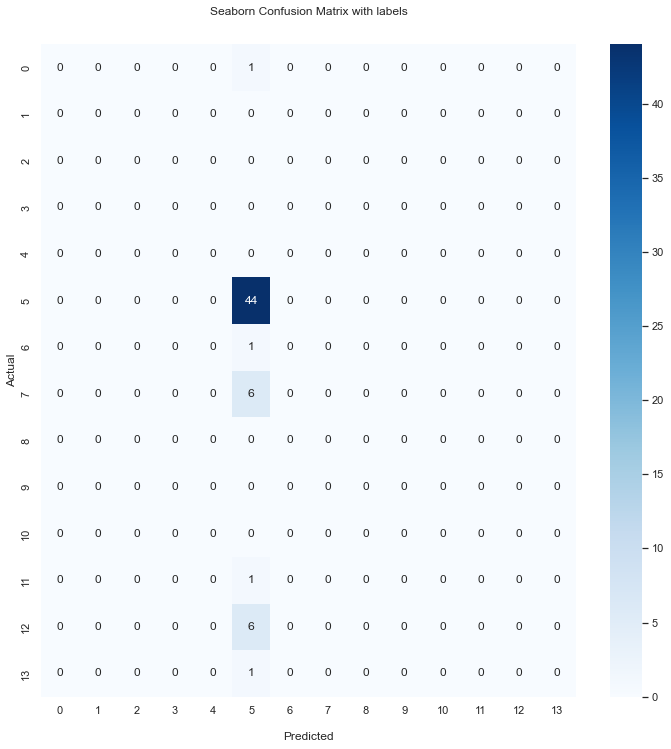

In [ ]:
def plot_confusion(cf_matrix, labels):
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    sns.set(rc={'figure.figsize':(12, 12)})

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted')
    ax.set_ylabel('Actual');

    ## Ticket labels - List must be in alphabetical order
    # ax.xaxis.set_ticklabels(labels)
    # ax.yaxis.set_ticklabels(labels)

    ## Display the visualization of the Confusion Matrix.
    plt.show()

plot_confusion(cf_matrix, labels)

## Random Forest

In [ ]:
forest = ensemble.RandomForestClassifier(n_estimators = 100)
forest_fit = forest.fit(train_X, train_y)

# predict
rf_predict_y = forest.predict(test_X)

# evaluation
accuracy = metrics.accuracy_score(test_y, clf_predict_y)
print(accuracy)

print('confusion_matrix:\n', confusion_matrix(test_y, clf_predict_y, labels=labels))
print(labels)

0.7333333333333333
confusion_matrix:
 [[ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]]
['oncocytoma', 'other', 'multilocular_cystic_rcc', 'mest', 'wilms', 'clear_cell_rcc', 'clear_cell_papillary_rcc', 'chromophobe', 'rcc_unclassified', 'collecting_duct_undefined', 'spindle_cell_neoplasm', 'angiomyolipoma', 'papillary', 'urothelial']


## Grid Search for params

In [47]:
param_grid = [
    {'n_estimators': [10, 30, 100], 'max_depth': [5, 10, 20, None]}
]

forest_clf = ensemble.RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                          scoring='accuracy')

grid_search.fit(train_X, train_y)

c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10, 20, None],
                          'n_estimators': [10, 30, 100]}],
             scoring='accuracy')

In [48]:
print('best params:', grid_search.best_params_)

best_rf = grid_search.best_estimator_
best_rf_predict_y = best_rf.predict(test_X)

# evaluation
accuracy = metrics.accuracy_score(test_y, best_rf_predict_y)
print('test acc:', accuracy)
print('train acc:', metrics.accuracy_score(train_y, best_rf.predict(train_X)))

print('confusion_matrix:\n', confusion_matrix(test_y, rf_predict_y, labels=labels))
print(labels)

best params: {'max_depth': 5, 'n_estimators': 100}
test acc: 0.7333333333333333
train acc: 0.8125
confusion_matrix:
 [[ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 43  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0]]
['oncocytoma', 'other', 'multilocular_cystic_rcc', 'mest', 'wilms', 'clear_cell_rcc', 'clear_cell_papillary_rcc', 'chromophobe', 'rcc_unclassified', 'collecting_duct_undefined', 'spindle_cell_neoplasm', 'angiomyolipoma', 'papillary', 'urothelial']


In [49]:
# le = LabelEncoder()
# le.fit(train_y)
# print(le.classes_)
# encoded_train_y = le.transform(train_y)

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# print(roc_auc_score(test_y_mapping, forest.predict_proba(test_X), multi_class='ovr'))
# fpr, tpr, threshold = roc_auc_score(test_y, rf_predict_y, multiclass='ovo')
# print(fpr, tpr, threshold)

# auc1 = auc(fpr, tpr)
# ## Plot the result
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()    


## Feature Selection for Random Forest

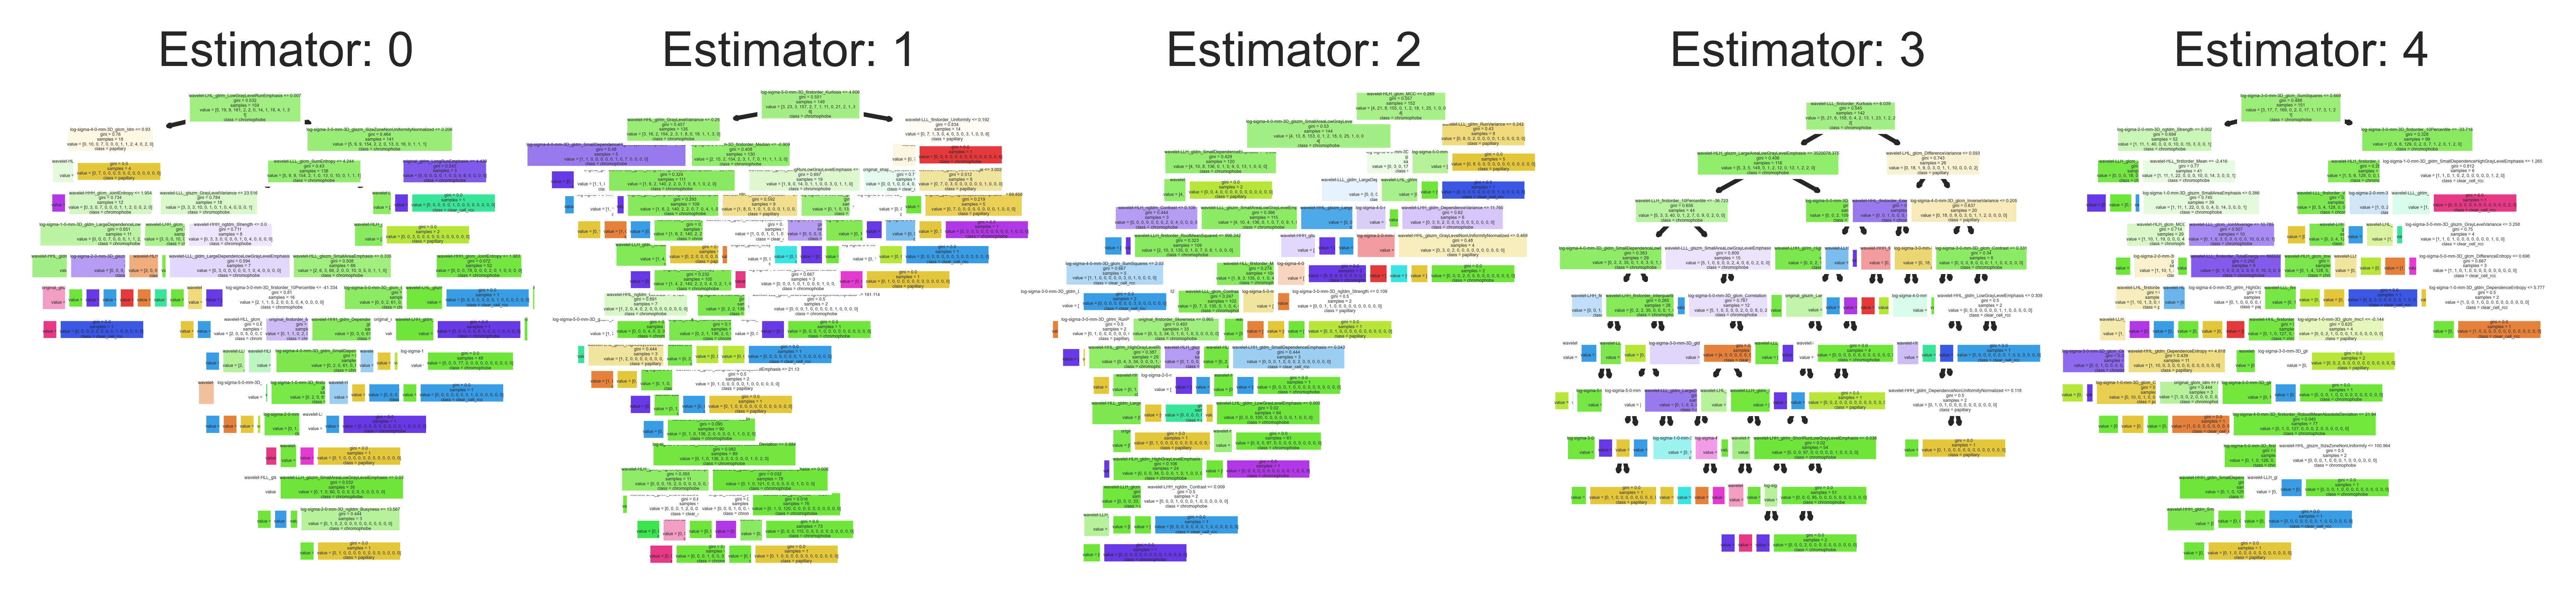

In [51]:
from sklearn import tree

# This may not the best way to view each estimator as it is small
fn=df.columns
cn=label
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(forest.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_individualtree.png')

In [53]:
import xgboost as xgb
import numpy as np

# clf1 = xgb.XGBClassifier()

# param_dist = {
#     'n_estimators': [80, 100, 150],
#     'max_depth': [5, 10, 15],
#     'learning_rate' : [0.01, 0.1, 0.5, 1],
#     'subsample' : [0.7, 0.8, 0.9],
#     'colsample_bytree' : [0.5, 0.7, 0.9],
#     'min_child_weight' : [3, 5, 7]
# }

# grid_search = GridSearchCV(clf1, param_dist, cv = 5, scoring = 'accuracy')

# grid_search.fit(train_X, train_y)

# best_estimator = grid_search.best_estimator_

# print(best_estimator)

# print('best params:', grid_search.best_params_)

# best_rf = grid_search.best_estimator_
# best_rf_predict_y = best_rf.predict(test_X)

# # evaluation
# accuracy = metrics.accuracy_score(test_y, best_rf_predict_y)
# print('acc:', accuracy)

# print('confusion_matrix:\n', confusion_matrix(test_y, rf_predict_y, labels=labels))
# print(labels)

### Original Data

In [54]:
wavelet_column = []
log_column = []

for item in df.columns:
    if 'wavelet' in item:
        wavelet_column.append(item)
    elif 'log' in item:
        log_column.append(item)

print('wavelet including 8 filter:', len(wavelet_column))
print('log including 5 params:', len(log_column))

wavelet including 8 filter: 744
log including 5 params: 465


In [55]:
print(wavelet_column[:5])
print(log_column[:5])

['wavelet-LLH_firstorder_10Percentile', 'wavelet-LLH_firstorder_90Percentile', 'wavelet-LLH_firstorder_Energy', 'wavelet-LLH_firstorder_Entropy', 'wavelet-LLH_firstorder_InterquartileRange']
['log-sigma-1-0-mm-3D_firstorder_10Percentile', 'log-sigma-1-0-mm-3D_firstorder_90Percentile', 'log-sigma-1-0-mm-3D_firstorder_Energy', 'log-sigma-1-0-mm-3D_firstorder_Entropy', 'log-sigma-1-0-mm-3D_firstorder_InterquartileRange']


In [ ]:
# original image and features
df_original = df.drop(wavelet_column, axis=1)
df_original = df_original.drop(log_column, axis=1)

# log
print(df_original.shape)

(300, 107)


In [58]:
df_wavelet = df[wavelet_column]
df_log = df[log_column]

print(df_wavelet.shape)
print(df_log.shape)

(300, 744)
(300, 465)


In [70]:
wavelet_LLH = [ col for col in wavelet_column if 'LLH' in col]
wavelet_LHL = [ col for col in wavelet_column if 'LHL' in col]
wavelet_HLL = [ col for col in wavelet_column if 'HLL' in col]

wavelet_LHH = [ col for col in wavelet_column if 'LHH' in col]
wavelet_HLH = [ col for col in wavelet_column if 'HLH' in col]
wavelet_HHL = [ col for col in wavelet_column if 'HHL' in col]

wavelet_HHH = [ col for col in wavelet_column if 'HHH' in col]

print('LLH:', len(wavelet_LLH))
print('LHL:', len(wavelet_LHL))
print('HLL:', len(wavelet_HLL))

print('LHH:', len(wavelet_LHH))
print('HLH:', len(wavelet_HLH))
print('HHL:', len(wavelet_HHL))

print('HHH:', len(wavelet_HHH))

df_wavelet_LLH = df[wavelet_LLH]
df_wavelet_LHL = df[wavelet_LHL]
df_wavelet_HLL = df[wavelet_HLL]

df_wavelet_LHH = df[wavelet_LHH]
df_wavelet_HLH = df[wavelet_HLH]
df_wavelet_HHL = df[wavelet_HHL]

df_wavelet_HHH = df[wavelet_HHH]


LLH: 93
LHL: 93
HLL: 93
LHH: 93
HLH: 93
HHL: 93
HHH: 93


In [78]:
log_filter = []
df_log_list = []

for idx in range(1, 6):
    matched_col = [ col for col in log_column if f"log-sigma-{idx}-0" in col]
    log_filter.append(matched_col)

    df_log_list.append(df[matched_col])
    print('df log', idx, ':', df_log_list[idx - 1].shape)

df log 1 : (300, 93)
df log 2 : (300, 93)
df log 3 : (300, 93)
df log 4 : (300, 93)
df log 5 : (300, 93)


In [71]:
def grid_search_evaluate(train_X, train_y, test_X, test_y, grid_search):
    print('best params:', grid_search.best_params_)

    best_clf = grid_search.best_estimator_
    best_clf_predict_y = best_clf.predict(test_X)

    # evaluation
    accuracy = metrics.accuracy_score(test_y, best_clf_predict_y)
    print('test acc:', accuracy)
    print('train acc:', metrics.accuracy_score(train_y, best_clf.predict(train_X)))

    #print('confusion_matrix:\n', confusion_matrix(test_y, best_clf_predict_y, labels=labels))



def SVC_grid_search(train_X, train_y, test_X, test_y):
    parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

    param_grid = [
        { 'kernel': ['poly'], 'degree': [3, 4, 5], 'coef0': [0, 1], 'gamma': ['scale', 'auto'] },
        { 'C': [0.5, 1, 1.5], 'gamma': ['scale', 'auto'] }
    ]

    svc_clf = SVC()
    grid_search = GridSearchCV(svc_clf, param_grid, cv=5,
                            scoring='accuracy')

    grid_search.fit(train_X, train_y)
    # Evaluation
    grid_search_evaluate(train_X, train_y, test_X, test_y, grid_search)


def RF_grid_search(train_X, train_y, test_X, test_y):
    param_grid = [
        {'n_estimators': [10, 30, 100], 'max_depth': [5, 10, 20, None]}
    ]

    forest_clf = ensemble.RandomForestClassifier()
    grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                            scoring='accuracy')

    grid_search.fit(train_X, train_y)
    # Evaluation
    grid_search_evaluate(train_X, train_y, test_X, test_y, grid_search)


def run_predict(df_type):
    train_X, test_X, train_y, test_y = train_test_split(df_type, tumor_type, test_size = 0.2)
    # SVC
    SVC_grid_search(train_X, train_y, test_X, test_y)

    # Random Forest
    RF_grid_search(train_X, train_y, test_X, test_y)

In [ ]:
run_predict(df_original)

c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
test acc: 0.6666666666666666
train acc: 0.6833333333333333
confusion_matrix:
 [[ 0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 40  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'max_depth': None, 'n_estimators': 100}
test acc: 0.6166666666666667
train acc: 1.0
confusion_matrix:
 [[ 0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0 37  0  1  0  0  0  0  1  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [59]:
run_predict(df_wavelet)

c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
test acc: 0.7166666666666667
train acc: 0.6833333333333333
confusion_matrix:
 [[ 0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 43  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'max_depth': 5, 'n_estimators': 10}
test acc: 0.7
train acc: 0.7833333333333333
confusion_matrix:
 [[ 0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [60]:
run_predict(df_log)

c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
test acc: 0.75
train acc: 0.6666666666666666
confusion_matrix:
 [[ 0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 45  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]]


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'max_depth': 5, 'n_estimators': 100}
test acc: 0.75
train acc: 0.7958333333333333
confusion_matrix:
 [[ 0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 45  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]]


In [75]:
wavelet_filters = [ df_wavelet_LLH, 
                    df_wavelet_LHL,
                    df_wavelet_HLL,
                    df_wavelet_LHH,
                    df_wavelet_HLH,
                    df_wavelet_HHL,
                    df_wavelet_HHH
                  ]
col_name = ['LLH',
            'LHL',
            'HLL',
            'LHH',
            'HLH',
            'HHL',
            'HHH']

for idx, wav_col in enumerate(wavelet_filters):
  print(col_name[idx], ":")
  run_predict(wav_col)
  print('-' * 30)

LLH :


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
test acc: 0.7666666666666667
train acc: 0.6583333333333333


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'max_depth': 5, 'n_estimators': 30}
test acc: 0.75
train acc: 0.7916666666666666
------------------------------
LHL :


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
test acc: 0.6833333333333333
train acc: 0.6791666666666667


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'max_depth': 5, 'n_estimators': 30}
test acc: 0.6666666666666666
train acc: 0.7666666666666667
------------------------------
HLL :


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
test acc: 0.6666666666666666
train acc: 0.6833333333333333


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'max_depth': 5, 'n_estimators': 100}
test acc: 0.65
train acc: 0.7458333333333333
------------------------------
LHH :


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'C': 0.5, 'gamma': 'scale'}
test acc: 0.75
train acc: 0.6625


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'max_depth': None, 'n_estimators': 30}
test acc: 0.7
train acc: 1.0
------------------------------
HLH :


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
test acc: 0.5333333333333333
train acc: 0.7166666666666667


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'max_depth': 5, 'n_estimators': 100}
test acc: 0.55
train acc: 0.7541666666666667
------------------------------
HHL :


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
test acc: 0.5833333333333334
train acc: 0.7083333333333334


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'max_depth': 5, 'n_estimators': 100}
test acc: 0.5833333333333334
train acc: 0.7375
------------------------------
HHH :


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'C': 0.5, 'gamma': 'scale'}
test acc: 0.6333333333333333
train acc: 0.6916666666666667


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'max_depth': 5, 'n_estimators': 100}
test acc: 0.6166666666666667
train acc: 0.7416666666666667
------------------------------


In [79]:
for idx, log_level in enumerate(df_log_list):
    print('-' * 10, 'log', idx+1, ":", '-' * 10)
    run_predict(log_level)

---------- log 1 : ----------


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'C': 0.5, 'gamma': 'scale'}
test acc: 0.75
train acc: 0.6625


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'max_depth': 5, 'n_estimators': 100}
test acc: 0.7666666666666667
train acc: 0.725
---------- log 2 : ----------


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'C': 0.5, 'gamma': 'scale'}
test acc: 0.6166666666666667
train acc: 0.6958333333333333


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'max_depth': 5, 'n_estimators': 100}
test acc: 0.6
train acc: 0.7958333333333333
---------- log 3 : ----------


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'C': 0.5, 'gamma': 'scale'}
test acc: 0.75
train acc: 0.6625


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'max_depth': 5, 'n_estimators': 10}
test acc: 0.7333333333333333
train acc: 0.8166666666666667
---------- log 4 : ----------


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'C': 0.5, 'gamma': 'scale'}
test acc: 0.6833333333333333
train acc: 0.6791666666666667


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'max_depth': 5, 'n_estimators': 10}
test acc: 0.6666666666666666
train acc: 0.8083333333333333
---------- log 5 : ----------


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'C': 0.5, 'gamma': 'scale'}
test acc: 0.7
train acc: 0.675


c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best params: {'max_depth': 5, 'n_estimators': 100}
test acc: 0.7
train acc: 0.7458333333333333


# Conclusion
* Over-sampling for **oncocytoma**: 16', **chromophobe**: 27, **papillary**: 28 => Double these data
* Model:
    1. SVC
        * best params: {'C': 1, 'gamma': 'auto'}
        <!-- * acc: 0.9805825242718447 -->
    2. Random Forest
        * best params: {'max_depth': None, 'n_estimators': 100}
        <!-- * acc: 0.9514563106796117 -->